Import Lib

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Train and Test Spliting
from sklearn.model_selection import train_test_split

#Models
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Cross Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

#Score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

#Graphs
import matplotlib.pyplot as plt

%matplotlib inline

Import Data

In [142]:
data = pd.read_csv("./content/spam_ham_dataset.csv")


Basic Analysis

In [143]:
data.head()

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [144]:
data.tail()

,# sent emails,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   label           5171 non-null   object
 2   text            5171 non-null   object
 3   label_num       5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [146]:
data.describe()

,# sent emails,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [147]:
sum(data.duplicated()) == 0

True

In [148]:
data.drop_duplicates(inplace=True)

In [149]:
print (data.isnull().sum())

# sent emails     0
label             0
text              0
label_num         0
dtype: int64


In [150]:
data.dropna(inplace=True)

In [151]:
data.head(20)

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [152]:
data[data["label_num"]==0]

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...,...
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [153]:
data[data["label_num"] == 1]

,# sent emails,label,text,label_num
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
10,4922,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,3799,spam,Subject: report 01405 !\r\nwffur attion brom e...,1
13,3948,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1
...,...,...,...,...
5159,4381,spam,Subject: pictures\r\nstreamlined denizen ajar ...,1
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   label           5171 non-null   object
 2   text            5171 non-null   object
 3   label_num       5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [155]:
data.head()

,# sent emails,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [156]:

data["size text"] = data['text'].str.len()

In [157]:
data.groupby(["label_num"]).min()

,# sent emails,label,text,size text
label_num,,,,
0,0,ham,"Subject: "" ram tackett "" : pictures\r\ndaren l...",18
1,3672,spam,Subject: \r\n,11


In [158]:
data.groupby(["label_num"]).max()

,# sent emails,label,text,size text
label_num,,,,
0,3671,ham,Subject: zero path termination in path manager...,32258
1,5170,spam,Subject: zdrive 1 . 5 gb usb 2 . 0 portable st...,22073


In [159]:
data[data["text"].duplicated()]

,# sent emails,label,text,label_num,size text
182,4727,spam,Subject: \r\n,1,11
296,4690,spam,Subject: \r\n,1,11
363,4682,spam,Subject: \r\n,1,11
436,2084,ham,Subject: cornhusker up on 24 th\r\nspoke with ...,0,300
624,2034,ham,"Subject: enron / hpl actuals for november 13 ,...",0,119
...,...,...,...,...,...
5061,1729,ham,Subject: tenaska iv\r\nbob :\r\ni understand f...,0,2424
5064,4369,spam,Subject: \r\nthis week only : f . ree gen . er...,1,194
5089,4212,spam,Subject: \r\nthe permanent fix to penis growth...,1,160
5155,1904,ham,Subject: cleburne - tenaska iv plant\r\ndaren ...,0,242


Graphs

Text(0.5, 1.0, 'Number of Spam and Ham')

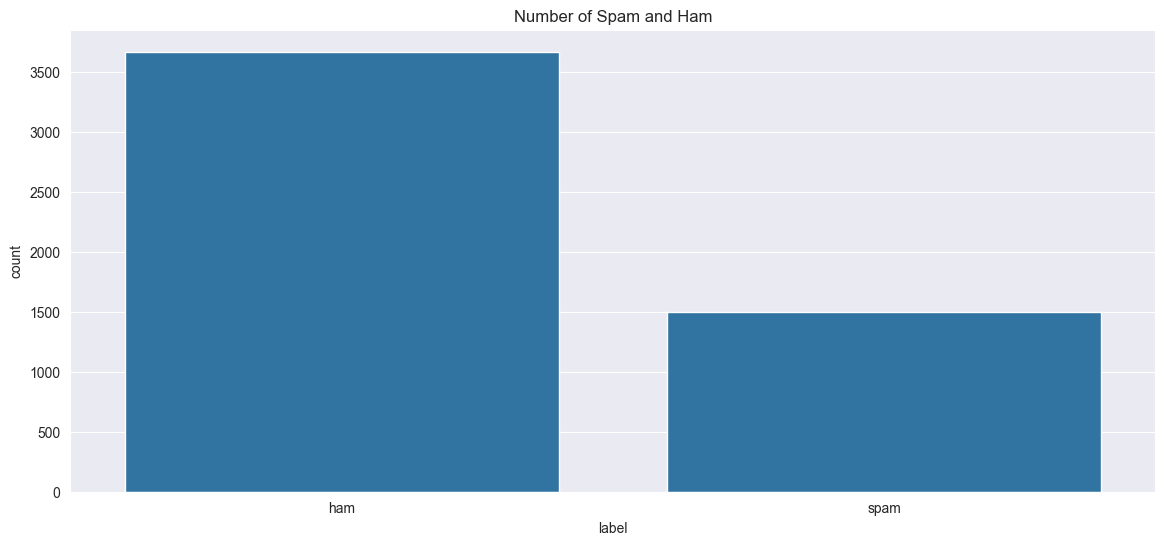

In [160]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label' ,data=data)
plt.title('Number of Spam and Ham')

Text(0.5, 1.0, 'Length of Text')

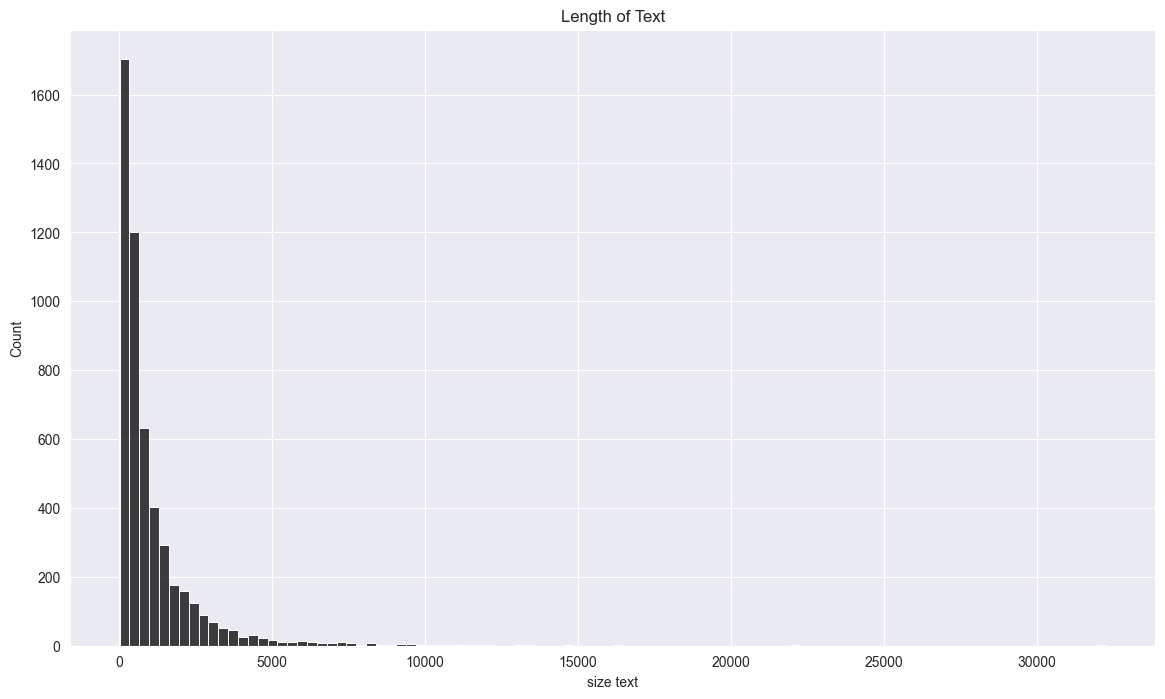

In [161]:
plt.figure(figsize=(14,8))
sns.histplot(x='size text',data=data,bins=100, color='black')
plt.title('Length of Text')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

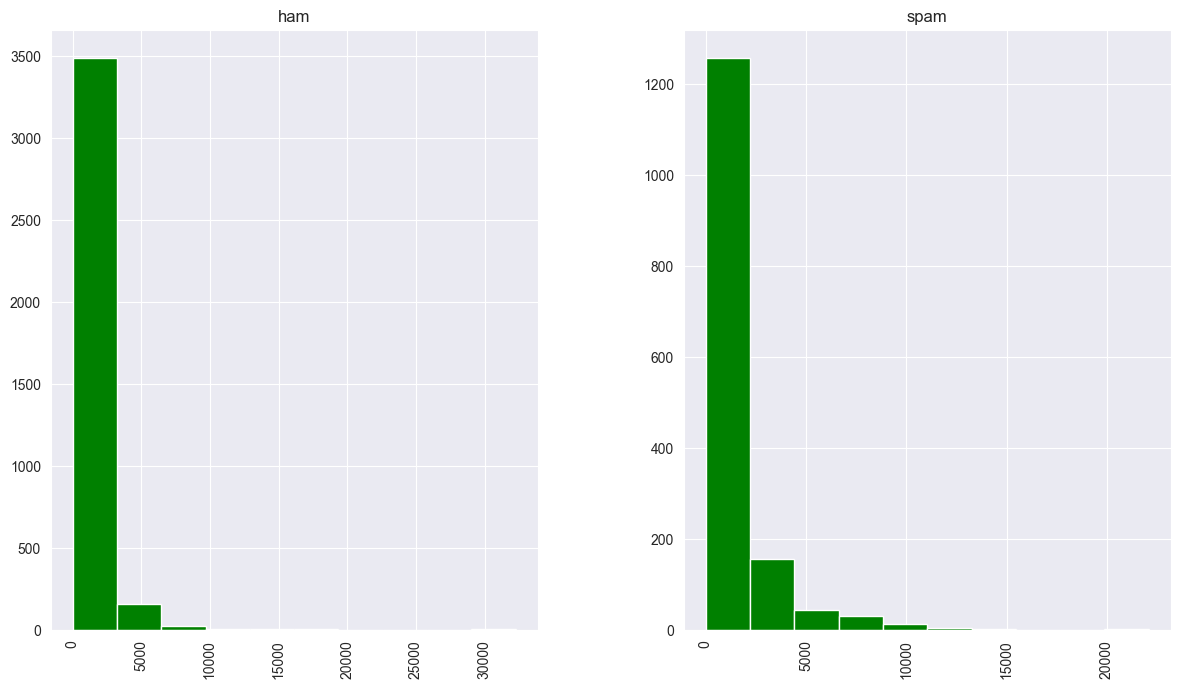

In [162]:
data.hist(column='size text',by='label',figsize=(14,8), color= 'green')

In [163]:
data.drop("size text" , axis =1 , inplace =True)
data.drop("label" , axis =1 , inplace =True)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # sent emails   5171 non-null   int64 
 1   text            5171 non-null   object
 2   label_num       5171 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 121.3+ KB


Train Test Split

In [165]:
X = data["text"]
Y = data["label_num"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Feature Extraction

In [166]:
featureExtraction = TfidfVectorizer(min_df= 1, stop_words='english', lowercase=True)
X_train_features = featureExtraction.fit_transform(X_train)
X_test_features = featureExtraction.transform(X_test)
#pickle.dump(featureExtraction, open("featureExtractionVectorizer" +'.pkl', 'wb')) # For Deployment

Models

In [167]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTreeClassifier', tree.DecisionTreeClassifier()),
    ('SVC', svm.SVC(kernel='linear')),
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, random_state=42))
]

Classification Report and Confusion Matrix

-----------------------------------------------------
LogisticRegression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

-----------------------------------------------------
DecisionTreeClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       742
           1       0.90      0.92      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035

-----------------------------------------------------
SVC Classification Report:

              precision    recall  f1-score   support

           

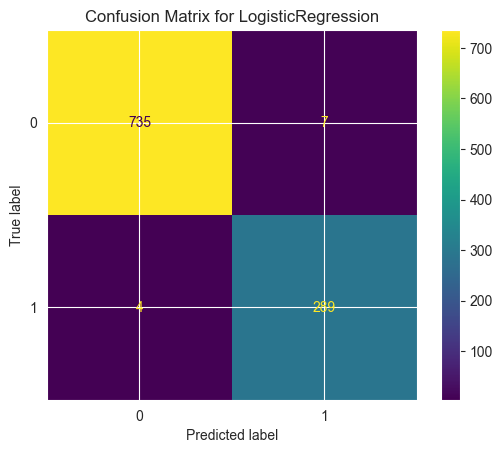

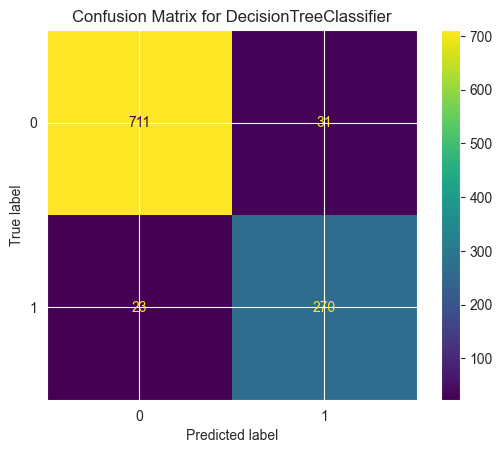

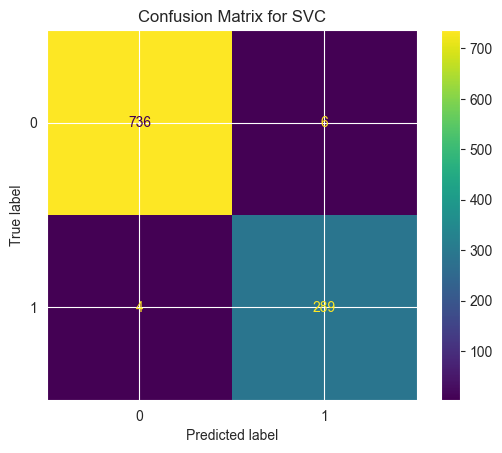

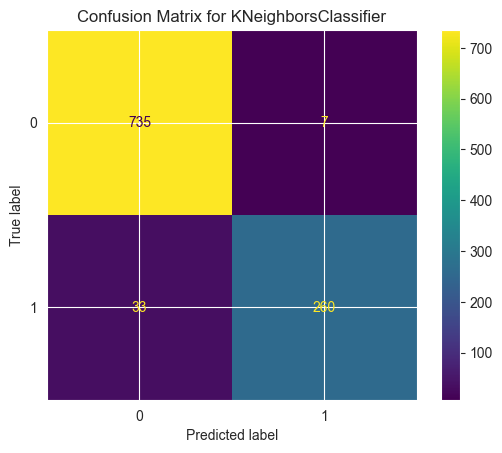

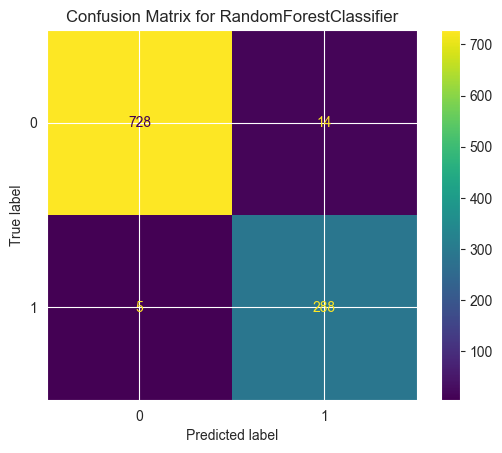

In [168]:
accuracies = {}

for name, model in models:
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred2 = model.predict(X_train_features)
    accuracy2 = accuracy_score(y_train, y_pred2)
    accuracies[name] = [accuracy, accuracy2]

    print('-----------------------------------------------------')
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
    plt.title("Confusion Matrix for " + name)
    #pickle.dump(model, open(name +'.pkl', 'wb')) # For Deployment
#pickle.dump(accuracies, open("accuracies.pkl", 'wb')) # For Deployment


K Folds Cross Validation Test

In [169]:
kf = KFold(n_splits=5)

for name, model in models:
    pipe = Pipeline([
        ('feature_extraction', TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)),
        ('model', model)
    ])
    scores = cross_val_score(pipe, X, Y, cv=kf)
    accuracy = np.mean(scores)
    std = np.std(scores)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"{name} Standard Deviation: {std:.5f}\n")

LogisticRegression Accuracy: 98.86%
LogisticRegression Standard Deviation: 0.00247

DecisionTreeClassifier Accuracy: 93.93%
DecisionTreeClassifier Standard Deviation: 0.00785

SVC Accuracy: 98.98%
SVC Standard Deviation: 0.00278

KNeighborsClassifier Accuracy: 96.44%
KNeighborsClassifier Standard Deviation: 0.00567

RandomForestClassifier Accuracy: 97.89%
RandomForestClassifier Standard Deviation: 0.00447



Prediction Using User Input

In [170]:
x = input("Enter an email: ")

x_input = [x]
x_features = featureExtraction.transform(x_input)

for name,model in models:
    y_pred = model.predict(x_features)

    if (y_pred == 0):
        print(f'{name} Predict : ham')
    else:
        print(f'{name} Predict : spam')

LogisticRegression Predict : spam
DecisionTreeClassifier Predict : spam
SVC Predict : spam
KNeighborsClassifier Predict : spam
RandomForestClassifier Predict : spam
